## **Análisis Univariado**

#### 📘 **Importación de librerías** 
Importamos las librerías que necesitaremos en nuestro análisis **univariado**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from statistics import mode
from scipy.stats import zscore
import seaborn as sns

#### 🛜 **Importación del dataset Telco preparado**

Este dataset proviene de la cartera de una empresa de telecomunicaciones que da servicio al Valle y al Tolima y se le realizó una limpieza previa en el archivo `PreparaciónData.ipynb` 

In [70]:
## Cargar datos 
df = pd.read_csv("./data/clientes_limpios.csv", sep=';')

## respaldo - backup 
df_original = df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165644 entries, 0 to 165643
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARIFA_PS                 165644 non-null  object 
 1   ESTADO_CLIENTE            165644 non-null  object 
 2   ESTADO_SUMINISTRO         165644 non-null  object 
 3   ESTADO_FACTURACION        165644 non-null  object 
 4   DEUDA                     165644 non-null  int64  
 5   ANTIGUEDAD_SALDO          165644 non-null  int64  
 6   CICLO                     165644 non-null  int64  
 7   ZONA                      165644 non-null  float64
 8   CLASE_SERVICIO            165644 non-null  object 
 9   ESTRATO                   165644 non-null  int64  
 10  DEPTO                     165644 non-null  object 
 11  MUNICIPIO                 165644 non-null  object 
 12  BARRIO                    165644 non-null  object 
 13  TOTAL_FACTURADO           165644 non-null  f

In [71]:
df.isnull().sum()

TARIFA_PS                   0
ESTADO_CLIENTE              0
ESTADO_SUMINISTRO           0
ESTADO_FACTURACION          0
DEUDA                       0
ANTIGUEDAD_SALDO            0
CICLO                       0
ZONA                        0
CLASE_SERVICIO              0
ESTRATO                     0
DEPTO                       0
MUNICIPIO                   0
BARRIO                      0
TOTAL_FACTURADO             0
FECHA_FACTURACION           0
FECHA_VENCIMIENTO           0
FECHA_ULT_PAGO              0
VALOR_ULT_PAGO              0
TOTAL_FACTURADO_NULL        0
FACTURA_NULL                0
FACTURA_VENCIMIENTO_NULL    0
PAGO_NULL                   0
dtype: int64

---
## **Variables Numericas**

In [72]:
NUMERICAL_FEATURES = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Features:", NUMERICAL_FEATURES)

Numerical Features: ['DEUDA', 'ANTIGUEDAD_SALDO', 'CICLO', 'ZONA', 'ESTRATO', 'TOTAL_FACTURADO', 'VALOR_ULT_PAGO', 'TOTAL_FACTURADO_NULL', 'FACTURA_NULL', 'FACTURA_VENCIMIENTO_NULL', 'PAGO_NULL']


#### **DEUDA**

**Contexto:** Variable que indica el monto total adeudado por parte de la cuenta del cliente. Esta variable es nuestro posible target, además de `ANTIGUEDAD_SALDO`

In [ ]:
df['DEUDA'].describe()

count       165,644.00
mean        105,688.97
std       1,215,893.63
min        -587,969.00
25%               0.00
50%               0.00
75%         108,267.00
max     461,211,050.00
Name: DEUDA, dtype: float64

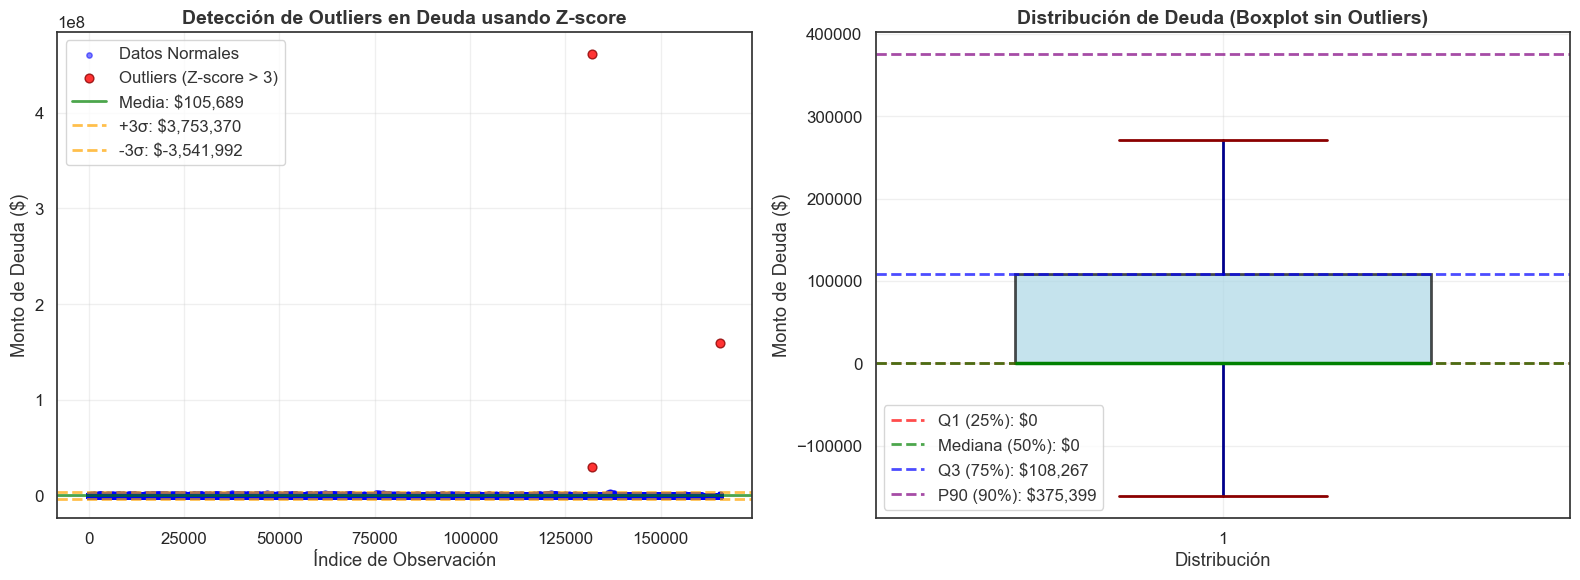

In [122]:
df['zscore'] = zscore(df['DEUDA'])
df['abs_zscore'] = np.abs(df['zscore'])

df_outliers = df[df['abs_zscore'] > 3]
df_normal = df[df['abs_zscore'] <= 3]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

scatter_normal = axes[0].scatter(df_normal.index, df_normal['DEUDA'], color='blue', alpha=0.5, s=15, label='Datos Normales')
scatter_outliers = axes[0].scatter(df_outliers.index, df_outliers['DEUDA'], color='red', alpha=0.8, s=40, label='Outliers (Z-score > 3)', edgecolors='darkred', linewidth=1)
axes[0].set_title('Detección de Outliers en Deuda usando Z-score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Índice de Observación')
axes[0].set_ylabel('Monto de Deuda ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

mean_deuda = df['DEUDA'].mean()
axes[0].axhline(y=mean_deuda, color='green', linestyle='-', linewidth=2, alpha=0.7, label=f'Media: ${mean_deuda:,.0f}')

std_deuda = df['DEUDA'].std()
upper_limit = mean_deuda + 3 * std_deuda
lower_limit = mean_deuda - 3 * std_deuda
axes[0].axhline(y=upper_limit, color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'+3σ: ${upper_limit:,.0f}')
axes[0].axhline(y=lower_limit, color='orange', linestyle='--', linewidth=2, alpha=0.7, label=f'-3σ: ${lower_limit:,.0f}')

axes[0].legend()
axes[0].grid(True, alpha=0.3)

box_plot = axes[1].boxplot(df['DEUDA'], showfliers=False, patch_artist=True, 
                          widths=0.6, boxprops=dict(linewidth=2),
                          whiskerprops=dict(linewidth=2, color='darkblue'),
                          capprops=dict(linewidth=2, color='darkred'),
                          medianprops=dict(linewidth=2.5, color='green'))

for box in box_plot['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

percentiles = df['DEUDA'].quantile([0.25, 0.5, 0.75, 0.9])
colors = ['red', 'green', 'blue', 'purple']
labels = ['Q1 (25%)', 'Mediana (50%)', 'Q3 (75%)', 'P90 (90%)']

for i, (p_val, color, label) in enumerate(zip(percentiles, colors, labels)):
    axes[1].axhline(y=p_val, color=color, linestyle='--', linewidth=2, 
                   alpha=0.7, label=f'{label}: ${p_val:,.0f}')

axes[1].set_title("Distribución de Deuda (Boxplot sin Outliers)", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Monto de Deuda ($)")
axes[1].set_xlabel("Distribución")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
#### **Outliers Atípicos y distribución de la deuda**

Al analizar la distribución de la **`DEUDA`** se observan los siguientes puntos:
- **Mediana = 0**
    La mayoría de los registros corresponden a clientes sin deuda (al día) o incluso con saldos negativos (a favor del cliente). Esto concentra gran parte de los datos en torno a cero y dificulta la evaluación de la morosidad.   

- **Q3 (Percentil 75%) = $108.267**  
    El 75% de los clientes deben como máximo este valor, la fuerte presencia de ceros y montos bajos, hace que la distribución esté **sesgada positivamente**.  

- **Max = $461.211.050**
    Existen outliers extremos con deudas muy elevadas, probablemente son clientes corporativos atípicos. Estos casos no representan el comportamiento general de los clientes (residenciales) que queremos estudiar  



---
#### **Filtrar Morosos**
Nos interesa analizar clientes con deudas mayores que cero ya que estos análisis van enfocados en la recuperación de cartera. 

In [98]:
df_morosos = df[df['DEUDA'] > 0]

df_morosos.describe()

,DEUDA,ANTIGUEDAD_SALDO,CICLO,ZONA,ESTRATO,TOTAL_FACTURADO,VALOR_ULT_PAGO,TOTAL_FACTURADO_NULL,FACTURA_NULL,FACTURA_VENCIMIENTO_NULL,PAGO_NULL,zscore,abs_zscore
count,"78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00","78,427.00"
mean,"224,204.78",3.57,2.94,1.60,2.11,"218,783.30","75,454.86",0.00,1.00,1.00,0.83,0.10,0.13
std,"1,759,461.07",3.48,1.73,0.49,0.89,"619,376.43","77,500.72",0.00,0.00,0.00,0.38,1.45,1.44
min,1.00,0.00,1.00,1.00,0.00,"-169,972.00","-275,000.00",0.00,1.00,1.00,0.00,-0.09,0.00
25%,"62,500.00",1.00,1.00,1.00,2.00,"62,500.00","43,400.00",0.00,1.00,1.00,1.00,-0.04,0.03
50%,"116,000.00",2.00,3.00,2.00,2.00,"125,800.00","59,900.00",0.00,1.00,1.00,1.00,0.01,0.04
75%,"319,200.00",6.00,4.00,2.00,3.00,"321,400.00","97,750.00",0.00,1.00,1.00,1.00,0.18,0.18
max,"461,211,050.00",33.00,7.00,3.00,6.00,"159,846,987.00","2,217,843.00",0.00,1.00,1.00,1.00,379.23,379.23


#### **Filtrar Outliers superiores**

Para filtrar aquellos valores atípicos extremadamente grandes, realizamos el rango intercuartílico IQR y así tener una muestra más representativa.

In [101]:
Q1 = df_morosos['DEUDA'].quantile(0.25)
Q3 = df_morosos['DEUDA'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR

df_sin_outliers = df_morosos[df_morosos['DEUDA'] <= limite_superior]

In [102]:
df_sin_outliers.describe()

,DEUDA,ANTIGUEDAD_SALDO,CICLO,ZONA,ESTRATO,TOTAL_FACTURADO,VALOR_ULT_PAGO,TOTAL_FACTURADO_NULL,FACTURA_NULL,FACTURA_VENCIMIENTO_NULL,PAGO_NULL,zscore,abs_zscore
count,"75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00","75,882.00"
mean,"190,687.56",3.31,2.92,1.60,2.11,"195,934.16","76,285.60",0.00,1.00,1.00,0.84,0.07,0.10
std,"169,895.41",3.05,1.72,0.49,0.88,"174,278.99","77,606.50",0.00,0.00,0.00,0.37,0.14,0.12
min,1.00,0.00,1.00,1.00,0.00,"-169,972.00","-275,000.00",0.00,1.00,1.00,0.00,-0.09,0.00
25%,"62,500.00",1.00,1.00,1.00,2.00,"62,500.00","45,000.00",0.00,1.00,1.00,1.00,-0.04,0.03
50%,"111,800.00",2.00,3.00,2.00,2.00,"125,000.00","59,900.00",0.00,1.00,1.00,1.00,0.01,0.04
75%,"288,000.00",5.00,4.00,2.00,3.00,"296,400.00","99,254.50",0.00,1.00,1.00,1.00,0.15,0.15
max,"704,160.00",24.00,6.00,2.00,6.00,"1,432,130.00","2,217,843.00",0.00,1.00,1.00,1.00,0.49,0.49


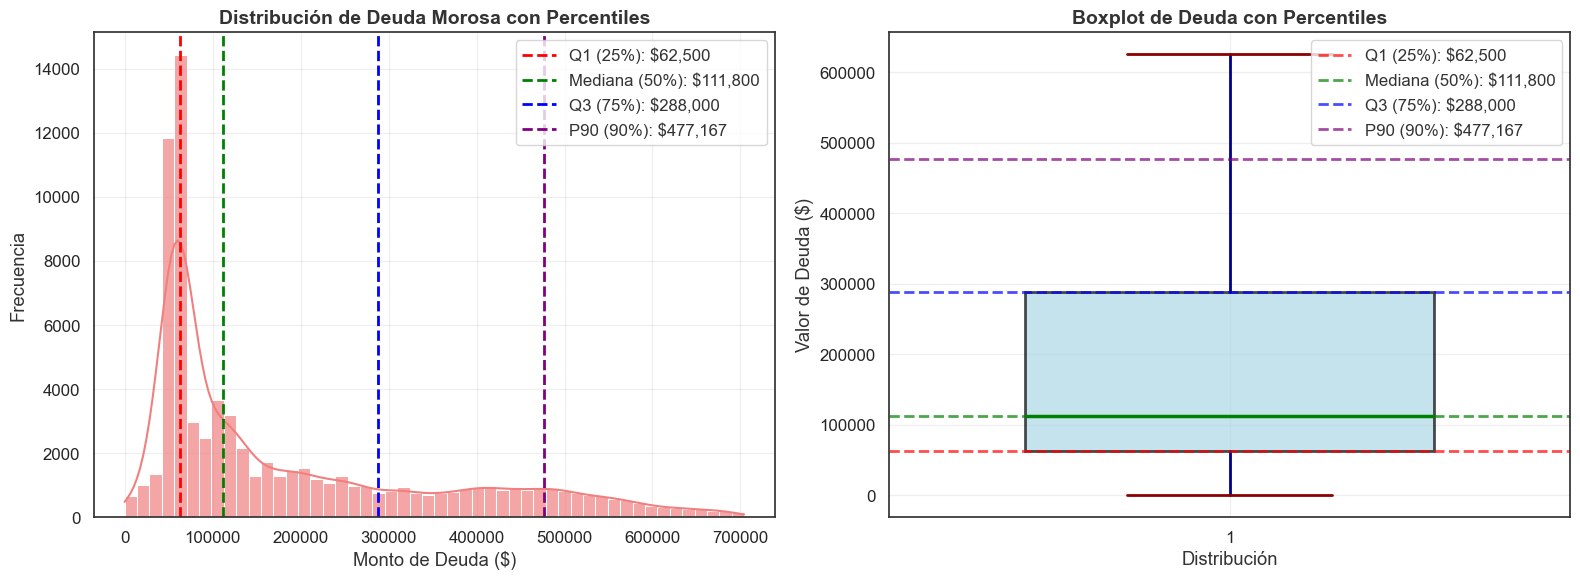

In [121]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(df_sin_outliers['DEUDA'], kde=True, bins=50, ax=axes[0], 
             color='lightcoral', alpha=0.7)

percentiles = df_sin_outliers['DEUDA'].quantile([0.25, 0.5, 0.75, 0.9])
colors = ['red', 'green', 'blue', 'purple']
labels = ['Q1 (25%)', 'Mediana (50%)', 'Q3 (75%)', 'P90 (90%)']

for i, (p_val, color, label) in enumerate(zip(percentiles, colors, labels)):
    axes[0].axvline(p_val, color=color, linestyle='--', linewidth=2, label=f'{label}: ${p_val:,.0f}')

axes[0].set_title('Distribución de Deuda Morosa con Percentiles', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Monto de Deuda ($)')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

box_plot = axes[1].boxplot(df_sin_outliers['DEUDA'], showfliers=False, patch_artist=True, 
                          widths=0.6, boxprops=dict(linewidth=2),
                          whiskerprops=dict(linewidth=2, color='darkblue'),
                          capprops=dict(linewidth=2, color='darkred'),
                          medianprops=dict(linewidth=2.5, color='green'))

for box in box_plot['boxes']:
    box.set_facecolor('lightblue')
    box.set_alpha(0.7)

for i, (p_val, color, label) in enumerate(zip(percentiles, colors, labels)):
    axes[1].axhline(y=p_val, color=color, linestyle='--', linewidth=2, 
                   alpha=0.7, label=f'{label}: ${p_val:,.0f}')

axes[1].set_title("Boxplot de Deuda con Percentiles", fontsize=14, fontweight='bold')
axes[1].set_ylabel("Valor de Deuda ($)")
axes[1].set_xlabel("Distribución")
axes[1].grid(True, alpha=0.3)
axes[1].legend()
plt.tight_layout()
plt.show()